In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Ground truth function

In [2]:
def ground_truth(x):
    return np.sin(x * 20) + 2 * np.sin(x * 2) + 3 * np.cos(x * 4)

def dground_truth(x):
    return 20 * np.cos(x * 20) + 4 * np.cos(x * 2) - 12 * np.sin(x * 4)

def ddground_truth(x):
    return -400 * np.sin(x * 20) - 8 * np.sin(x * 2) - 48 * np.cos(x * 4)

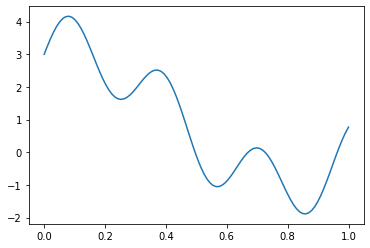

In [3]:
x_truth = np.linspace(0, 1, 100)
y_truth = ground_truth(x_truth)
plt.plot(x_truth, y_truth)

## Derivative

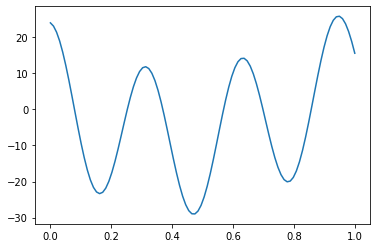

In [4]:
plt.plot(x_truth, dground_truth(x_truth))

## Second derivative

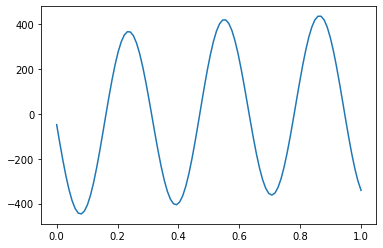

In [5]:
plt.plot(x_truth, ddground_truth(x_truth))

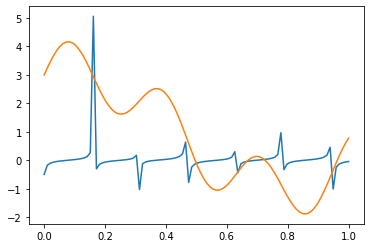

In [6]:
newton_step = np.where(np.abs(ddground_truth(x_truth)) > 2, dground_truth(x_truth) / ddground_truth(x_truth), 0)
plt.plot(x_truth, newton_step)
plt.plot(x_truth, y_truth)

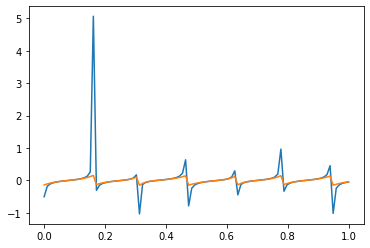

In [396]:
newton_step = np.where(np.abs(ddground_truth(x_truth)) > 4, dground_truth(x_truth) / ddground_truth(x_truth), 0)
arctan_newton_step = np.arctan(10 * y1) / 10
plt.plot(x_truth, newton_step)
plt.plot(x_truth, arctan_newton_step)

# Sampling

In [7]:
frequency = np.pi * 9

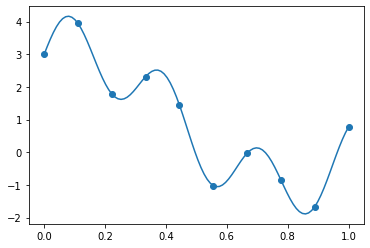

In [8]:
x_sample = np.linspace(0, 1, 10)
y_sample = ground_truth(x_sample)
plt.scatter(x_sample, y_sample)
plt.plot(x_truth, y_truth)

# Interpolation

In [9]:
def sinc(x):
    mask = np.abs(x) > 0.001
    return np.where(mask, np.sin(np.pi * x) / (x * np.pi), np.ones_like(x))

def dsinc(x):
    y1 = np.pi * x * np.cos(np.pi * x) - np.sin(np.pi * x)
    y2 = np.pi * x * x
    mask = np.abs(x) > 0.000001
    return np.where(mask, y1 / y2, np.zeros_like(x))

def ddsinc(x):
    y1 = (2 - np.pi ** 2 * x ** 2) * np.sin(np.pi * x) - 2 * np.pi * x * np.cos(np.pi * x)
    y2 = np.pi * x ** 3
    mask = np.abs(x) > 0.000001
    return np.where(mask, y1 / y2, np.ones_like(x) * (- np.pi ** 2) / 3)

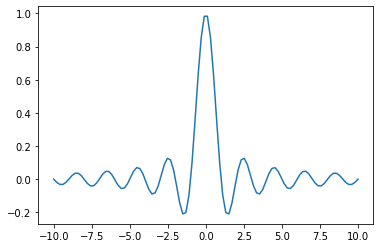

In [10]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sinc(x))

In [11]:
def interpolation(x, x_sample, y_sample, delta):
    matrix = sinc((x[:, None] - x_sample[None, :]) / delta)
    return matrix @ y_sample

def dinterpolation(x, x_sample, y_sample, delta):
    matrix = dsinc((x[:, None] - x_sample[None, :]) / delta) / delta
    return matrix @ y_sample

def ddinterpolation(x, x_sample, y_sample, delta):
    matrix = ddsinc((x[:, None] - x_sample[None, :]) / delta) / delta / delta
    return matrix @ y_sample

/tmp/ipykernel_261986/1775287788.py:3: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, np.sin(np.pi * x) / (x * np.pi), np.ones_like(x))


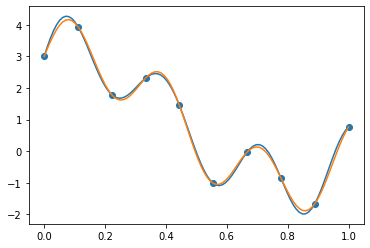

In [12]:
plt.plot(x_truth, interpolation(x_truth, x_sample, y_sample, 1/9.))
plt.scatter(x_sample, y_sample)
plt.plot(x_truth, y_truth)

## Derivative interpolation

/tmp/ipykernel_261986/1775287788.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, y1 / y2, np.zeros_like(x))


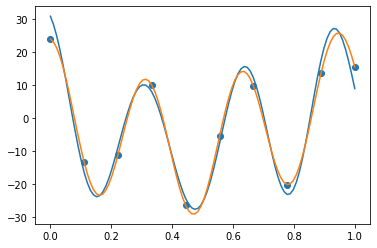

In [13]:
plt.plot(x_truth, dinterpolation(x_truth, x_sample, y_sample, 1/9.))
plt.plot(x_truth, dground_truth(x_truth))
plt.scatter(x_sample, dground_truth(x_sample))

## Double derivative interpolation

/tmp/ipykernel_261986/1775287788.py:15: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, y1 / y2, np.ones_like(x) * (- np.pi ** 2) / 3)


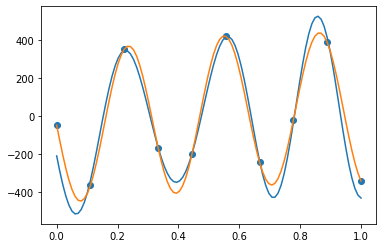

In [14]:
plt.plot(x_truth, ddinterpolation(x_truth, x_sample, y_sample, 1/9.))
plt.plot(x_truth, ddground_truth(x_truth))
plt.scatter(x_sample, ddground_truth(x_sample))

# Position adjustment

/tmp/ipykernel_261986/1775287788.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, y1 / y2, np.zeros_like(x))
/tmp/ipykernel_261986/1775287788.py:15: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, y1 / y2, np.ones_like(x) * (- np.pi ** 2) / 3)
/tmp/ipykernel_261986/1775287788.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, y1 / y2, np.zeros_like(x))
/tmp/ipykernel_261986/1775287788.py:15: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, y1 / y2, np.ones_like(x) * (- np.pi ** 2) / 3)


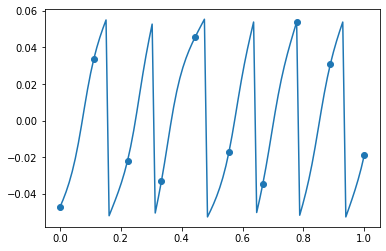

In [16]:
delta = dinterpolation(x_truth, x_sample, y_sample, 1/9.) / ddinterpolation(x_truth, x_sample, y_sample, 1/9.)
delta = np.arctan(frequency * delta) / frequency
plt.plot(x_truth, delta)

sampled_delta = dinterpolation(x_sample, x_sample, y_sample, 1/9.
                              ) / ddinterpolation(x_sample, x_sample, y_sample, 1/9.)
sampled_delta = np.arctan(frequency * sampled_delta) / frequency
plt.scatter(x_sample, sampled_delta)

In [17]:
delta = dinterpolation(x_sample, x_sample, y_sample, 1/9.) / ddinterpolation(x_sample, x_sample, y_sample, 1/9.)
delta = np.arctan(frequency * delta) / frequency
adjusted_x = x_sample - delta

/tmp/ipykernel_261986/1775287788.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, y1 / y2, np.zeros_like(x))
/tmp/ipykernel_261986/1775287788.py:15: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, y1 / y2, np.ones_like(x) * (- np.pi ** 2) / 3)


In [20]:
def nms_mask(x):
    mask_left = x > np.roll(x, 1)
    mask_left[0] = True
    mask_right = x > np.roll(x, -1)
    mask_right[-1] = True
    return mask_left & mask_right

def find_stationary_points(x_sample, y_sample, s):
    delta = dinterpolation(x_sample, x_sample, y_sample, s) / ddinterpolation(x_sample, x_sample, y_sample, s)
    frequency = np.pi / s
    delta = np.arctan(frequency * delta) / frequency
    adjusted_x = x_sample - delta
    mask = nms_mask(interpolation(adjusted_x, x_sample, y_sample, s))
    return adjusted_x[mask]

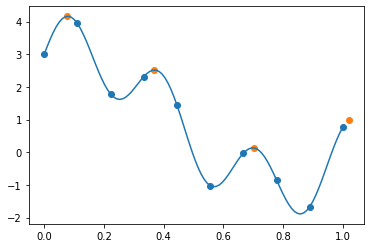

In [21]:
mask = nms_mask(interpolation(adjusted_x, x_sample, y_sample, 1/9.))
plt.scatter(x_sample, ground_truth(x_sample))
plt.scatter(adjusted_x[mask], ground_truth(adjusted_x[mask]))
plt.plot(x_truth, ground_truth(x_truth))

In [56]:
def norm(x):
    return np.exp(-x ** 2)

def reconstruct(x, y_sample, x_sample, delta):
    matrix = norm((x[:, None] - x_sample[None, :]) / delta)
    return matrix @ y_sample 

# def reconstruct(x, y_sample, x_sample, delta):
#     matrix = sinc((x[:, None] - x_sample[None, :]) / delta)
#     return matrix @ y_sample 

In [57]:
interpolation(adjusted_x[mask], x_sample, y_sample, 1/9.)

array([4.27094204, 2.45891723, 0.21075035, 0.86440616])

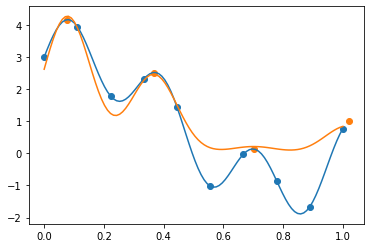

In [58]:
plt.scatter(x_sample, ground_truth(x_sample))
plt.scatter(adjusted_x[mask], ground_truth(adjusted_x[mask]))
plt.plot(x_truth, ground_truth(x_truth))
plt.plot(x_truth, reconstruct(x_truth, interpolation(adjusted_x[mask], x_sample, y_sample, 1/9.)[:4], 
                              adjusted_x[mask][:4], 1 / 9.))

# Non linear function

In [59]:
def sigma(x):
    return np.exp(x) / (1 + np.exp(x))

In [60]:
double_sampled_x = np.linspace(0, 1, 19)
upsampled_values = interpolation(double_sampled_x, x_sample, y_sample, 1 / 9.)
nonlinear_upsampled_values = sigma(upsampled_values)

/tmp/ipykernel_261986/1775287788.py:3: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, np.sin(np.pi * x) / (x * np.pi), np.ones_like(x))


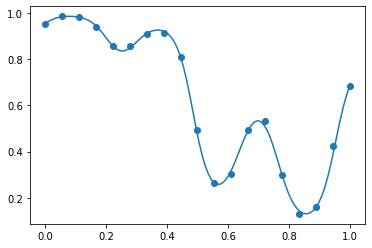

In [61]:
plt.plot(x_truth, sigma(ground_truth(x_truth)))
plt.scatter(double_sampled_x, nonlinear_upsampled_values)

In [62]:
downsampled_values = interpolation(x_sample, double_sampled_x, nonlinear_upsampled_values, 1 / 9.) / 2

/tmp/ipykernel_261986/1775287788.py:3: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, np.sin(np.pi * x) / (x * np.pi), np.ones_like(x))


/tmp/ipykernel_261986/1775287788.py:3: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, np.sin(np.pi * x) / (x * np.pi), np.ones_like(x))


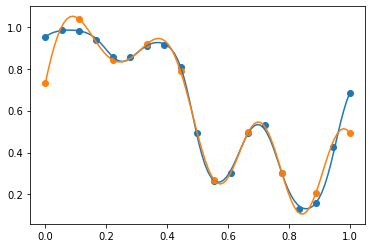

In [63]:
plt.plot(x_truth, sigma(ground_truth(x_truth)))
plt.scatter(double_sampled_x, nonlinear_upsampled_values)
plt.scatter(x_sample, downsampled_values)
plt.plot(x_truth, interpolation(x_truth, x_sample, downsampled_values, 1 / 9.))

/tmp/ipykernel_261986/1775287788.py:9: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, y1 / y2, np.zeros_like(x))
/tmp/ipykernel_261986/1775287788.py:15: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, y1 / y2, np.ones_like(x) * (- np.pi ** 2) / 3)
/tmp/ipykernel_261986/1775287788.py:3: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, np.sin(np.pi * x) / (x * np.pi), np.ones_like(x))


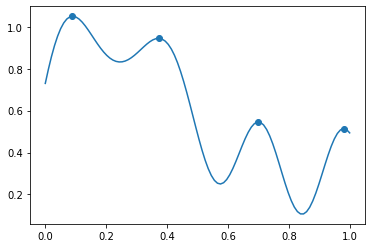

In [64]:
stationary_points = find_stationary_points(x_sample, downsampled_values, 1 / 9.)
plt.plot(x_truth, interpolation(x_truth, x_sample, downsampled_values, 1 / 9.))
plt.scatter(stationary_points, interpolation(stationary_points, x_sample, downsampled_values, 1 / 9.))

/tmp/ipykernel_261986/1775287788.py:3: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, np.sin(np.pi * x) / (x * np.pi), np.ones_like(x))


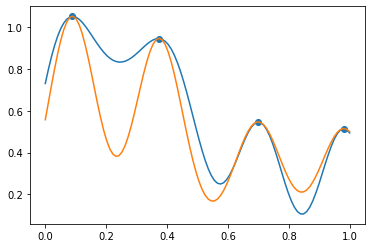

In [65]:
plt.plot(x_truth, interpolation(x_truth, x_sample, downsampled_values, 1 / 9.))
plt.scatter(stationary_points, interpolation(stationary_points, x_sample, downsampled_values, 1 / 9.))
plt.plot(x_truth, reconstruct(x_truth, interpolation(stationary_points, x_sample, downsampled_values, 1 / 9.), 
                              stationary_points, 1 / 9.))

In [66]:
sigmas = np.sqrt(-interpolation(stationary_points, x_sample, downsampled_values, 1 / 9.) / 
       ddinterpolation(stationary_points, x_sample, downsampled_values, 1 / 9.))

/tmp/ipykernel_261986/1775287788.py:3: RuntimeWarning: invalid value encountered in true_divide
  return np.where(mask, np.sin(np.pi * x) / (x * np.pi), np.ones_like(x))


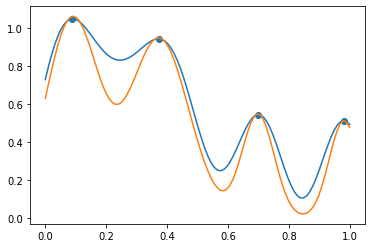

In [67]:
plt.plot(x_truth, interpolation(x_truth, x_sample, downsampled_values, 1 / 9.))
plt.scatter(stationary_points, interpolation(stationary_points, x_sample, downsampled_values, 1 / 9.))
plt.plot(x_truth, reconstruct(x_truth, interpolation(stationary_points, x_sample, downsampled_values, 1 / 9.), 
                              stationary_points, sigmas))